# 🧠 Parkinson's Disease Dataset - Exploratory Data Analysis (EDA)

В этом ноутбуке проводится исследовательский анализ данных (EDA) датасета Паркинсона.
- Изучим основные характеристики датасета
- Проверим баланс классов
- Построим визуализации распределений
- Посмотрим корреляции между признаками

Датасет: [UCI ML Parkinsons](https://storage.yandexcloud.net/academy.ai/practica/parkinsons.data)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки графиков
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Загружаем датасет
url = "https://storage.yandexcloud.net/academy.ai/practica/parkinsons.data"
df = pd.read_csv(url)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## 1. Общая информация о датасете

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


## 2. Баланс классов (здоровый / паркинсон)

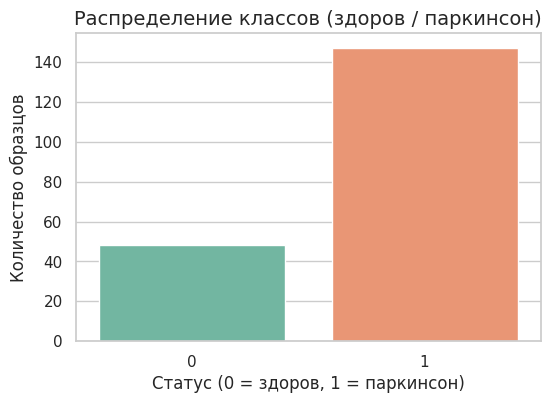

,proportion
status,
1,0.753846
0,0.246154


In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="status", hue="status", palette="Set2", legend=False)
plt.title("Распределение классов (здоров / паркинсон)", fontsize=14)
plt.xlabel("Статус (0 = здоров, 1 = паркинсон)")
plt.ylabel("Количество образцов")
plt.show()

df['status'].value_counts(normalize=True)

## 3. Распределение признаков

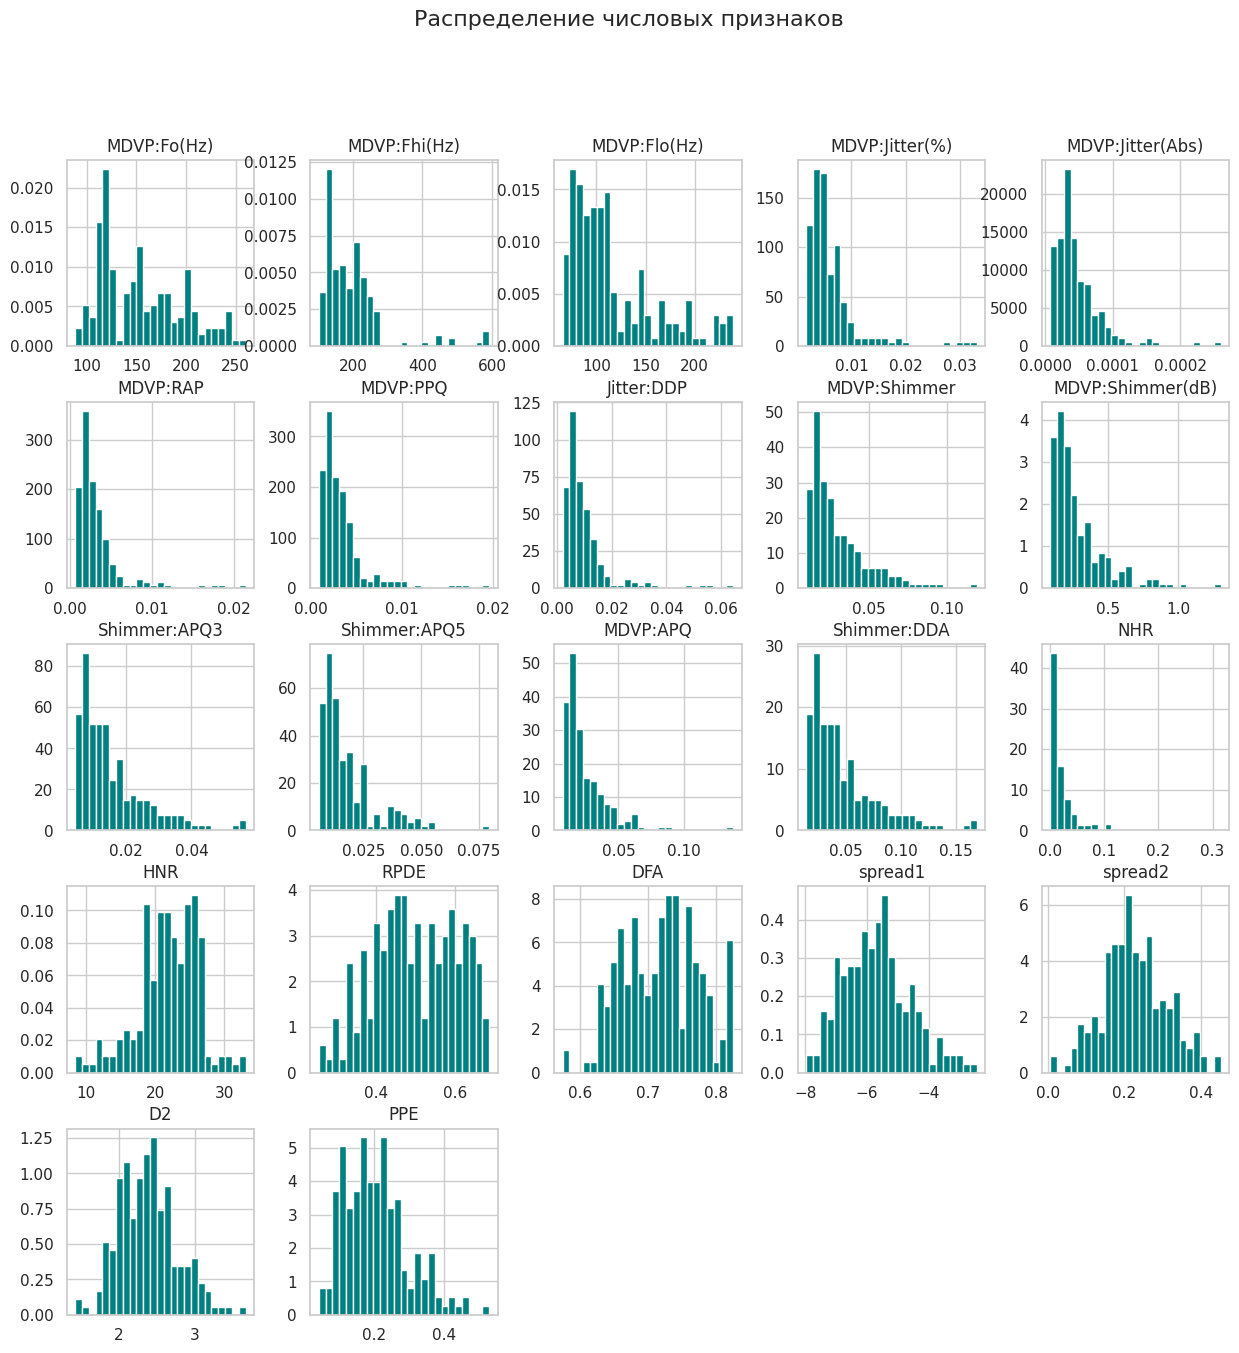

In [8]:
numeric_cols = df.drop(columns=['name','status']).columns

df[numeric_cols].hist(bins=25, figsize=(15, 15), color='teal', density=True)
plt.suptitle("Распределение числовых признаков", fontsize=16)
plt.show()

## 4. Корреляции между признаками

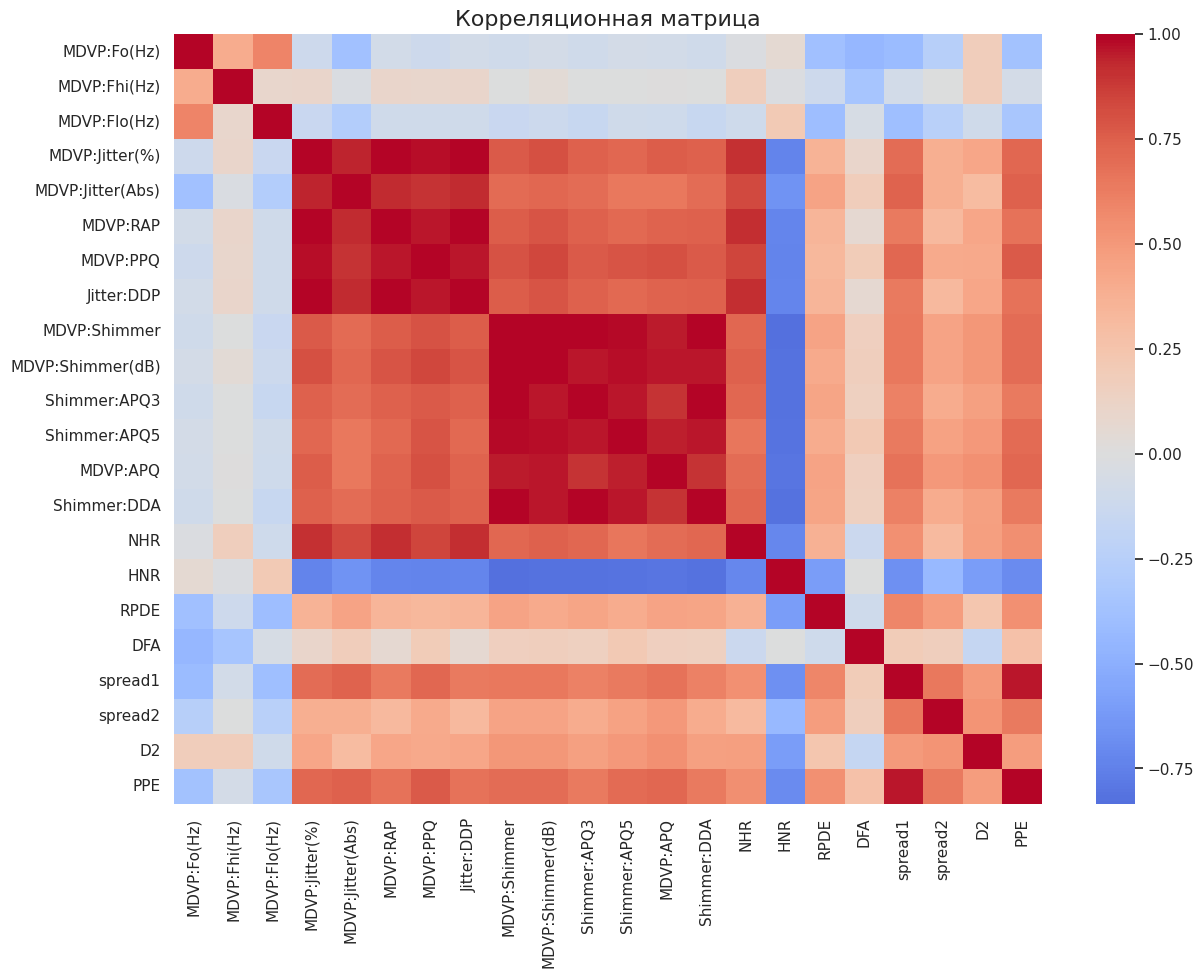

In [9]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Корреляционная матрица", fontsize=16)
plt.show()

## 5. Выводы
- Датасет содержит более 20 признаков, связанных с голосовыми характеристиками
- Классы несбалансированы (больше пациентов с болезнью Паркинсона)
- Некоторые признаки распределены неравномерно и содержат выбросы
- Существует сильная корреляция между рядом признаков (например, `MDVP:Fo(Hz)`, `MDVP:Fhi(Hz)`, `MDVP:Flo(Hz)`)

Этот анализ поможет подготовить данные для построения модели XGBoost.